# Problem 1: The Last Stone Game

The Last Stone is a two player game played over a square grid with stone pebbles of two colours (one for each player). A player is allowed to either place **one** stone or **two** stones in a single play onto the grid. The player who puts **the Last Stone** on the grid **wins** the game. There are some blocked cells in the grid that cannot be used by either players to place any stone. 

Let us assume that you are one of the players and your aim is to win the game (there are only two payoff values possible - +1 for win and -1 for loss). You must have guessed by now that you can be generate your best strategy in this game with the help of Minimax algorithm. 

Information about Minimax:

* Minimax algorithm is a recursive or backtracking algorithm which is used in decision-making and game theory.
* It provides an optimal move for the player assuming that opponent is also playing optimally.
* Minimax algorithm uses recursion to search through the game-tree.
* Minimax algorithm is mostly used for game playing in AI such as Chess, Checkers, tic-tac-toe, Go, and various tow-player games. This algorithm computes the minimax decision for the current state.




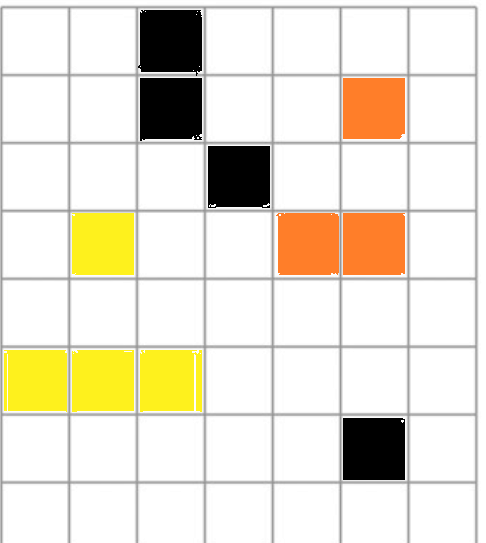


In this image, Red cells denote Player One, Yellow denotes Player Two and Black cells are blocked cells. In current scenario, player yellow has made four moves and now its the Red player's turn.

# Questions
Q.1: Find the best strategy using Minimax algorithm in 5x5 grid with one blocked location. Print the moves in the best strategy. 

Q.2: Implement $\alpha - \beta$ pruning to the Minimax algorithm to find the best strategy in 5x5 grid with one blocked location. Print the moves in the best strategy. Comment on the savings achieved with $\alpha - \beta$ pruning as compared to Minimax algorithm in Q.1 

Q.3: Let us assume that the decision on whether a player can place 1 stone or 2 stones is decided based on the toss of a coin. If Head comes then the player can place only 1 stone while a Tail on the coin flip will allow the player to place 2 stones. Find your best strategy in this version of the game using Expecti-Minimax in 5x5 grid with one blocked location.

Q.4: Experiment and analyze the effect of increasing the number of blocked cells from 1 to 5 on the performance of above algorithms (in terms of time, number of nodes explored, size of game tree).


Plot graphs to compare the performance in Q.3 and Q.4


In [ ]:
import numpy  as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer


In [ ]:
def visualize(block_counts):
  world=np.zeros([5,5]) #5x5 grid world
  blocked_cells=np.zeros([5,5])
  while(block_counts!=0):
    
    blockedx=np.random.randint(0,5)
    blockedy=np.random.randint(0,5)
    if(blocked_cells[blockedx][blockedy]==0):
      block_counts = block_counts-1
      blocked_cells[blockedx][blockedy]=1
      world[blockedx][blockedy]=5                   # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.

  
  while(moves):
    turn = 1
    emptypos=np.where(world == 0)                   # valid positions where stones can be placed
    allowedpos=list(zip(emptypos[0],emptypos[1]))   # return a list of coordinated wheere board is empty
    choice = moves.pop(0)                           # Choice of Player 
    if(turn == 1):
      if(choice == 1):
        x,y = allowedpos.pop()                      # removes first occupied position form the list. 
        world[x][y]=1
        print("PLAYER 1 places 1 stone :")
        print(world)
      elif(choice==2):
        x,y = allowedpos.pop()                      # removes first occupied position form the list. 
        world[x][y]=1
        x,y = allowedpos.pop()                      # removes first occupied position form the list. 
        world[x][y]=1
        print("PLAYER 1 places 2 stones :")
        print(world)
      
    if not moves:
      print("PLAYER 1 WINS!!!")
      break
    turn = 2
    choice = moves.pop(0)
    if(turn == 2):
      if(choice == 1):
        x,y = allowedpos.pop()                      # removes first occupied postion form the list. 
        world[x][y]=2
        print("PLAYER 2 places 1 stone :")
        print(world)
      elif(choice==2):
        x,y = allowedpos.pop()                      # removes first occupied postion form the list. 
        world[x][y]=2
        x,y = allowedpos.pop()                      # removes first ovvupied postion form the list. 
        world[x][y]=2
        print("PLAYER 2 places 2 stones :")
        print(world)
     
    if not moves:
      print("PLAYER 2 WINS!!!")
      break
  




### Answer.1: Find the best strategy using Minimax algorithm in 5x5 grid with one blocked location. Print the moves in the best strategy.  



In [ ]:
def p1_choice(emptycells,depth):              # returns Max-value
  global normal_nodesCount
  global normal_depth
  if(normal_depth < depth):
    normal_depth = depth
  normal_nodesCount = normal_nodesCount + 1
  if(emptycells==0): 
                                              # Check Terminal state : if no empty cells left that means PLayer 2 has already won
    return -1
                                                        # Return Max of all actions
  elif(emptycells>1):                                   # If cells left are more then 1 then Player 1 can place 1 or 2 stones
                   
    return max(p2_choice(emptycells-1,depth+1), p2_choice(emptycells-2,depth+1) )
  elif(emptycells==1):
    return p2_choice(emptycells-1,depth+1)              # If cells left are only 1 then Player 1 can place only 1 stone
    
  
  




In [ ]:
def p2_choice(emptycells,depth):                        # returns Min-Value
  global normal_nodesCount
  global normal_depth
  if(normal_depth < depth):
    normal_depth = depth
  normal_nodesCount = normal_nodesCount + 1
  if(emptycells==0): 
                                                        # Check Terminal state : if no empty cells left that means PLayer 1 has already won
    return 1
                                                        # Return Min of all actions
  elif(emptycells>1):                                   # If cells left are more then 1 then Player 2 can place 1 or 2 stones
                        
    return min(p1_choice(emptycells-1,depth+1),p1_choice(emptycells-2,depth+1))
      
  elif(emptycells==1):
    return p1_choice(emptycells-1,depth+1)              # Else PLayer 2 can only place 1 stone
   
  
  

In [ ]:
def minimax(emptycells):
  global choice1
  global choice2
  global normal_nodesCount
  normal_nodesCount = normal_nodesCount + 1
  choice1 = p2_choice(emptycells-1,1)                     # Player 1 can either place 1 stone
  if(emptycells>1):
    choice2 = p2_choice(emptycells-2,1)                   # or 2 stones
  if(choice1>choice2):                                    # Return max of choice 1 and choice 2
    res = choice1
    ch = 1
  else:
    res = choice2
    ch = 2
  
  return res,ch

In [ ]:
moves = []
normal_nodesCount = 0             # Number of Nodes
normal_depth = 0                  # Depth of Tree
blocked_count = 1                 # Number of Blocked cells
Emptycells = 25 - blocked_count                   # Number of Emptycells
win,tt = minimax(Emptycells)                                    
normal_treeDepth = normal_depth
minimax_work = normal_nodesCount
count = Emptycells                                             # define count to number of emptycells from start
while(count != 0):
  temp,ch = minimax(count)
  count = count - ch 
  moves.append(ch)
print(normal_treeDepth)           # Depth of Tree
print(win)                        # Final Value returned
print(moves)                      # Moves

visualize(blocked_count)                       # Visualization

24
-1
[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 2. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 2. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 1.]
 [1. 2. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 2. 1.]
 [1. 2. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYE

### Answer.2: Implement  α−β  pruning to the Minimax algorithm to find the best strategy in 5x5 grid with one blocked location. Print the moves in the best strategy. Comment on the savings achieved with  α−β  pruning as compared to Minimax algorithm in Q.1

In [ ]:
def p1_choice_alphabeta(emptycells,alpha,beta,depth):         #Max-value
  global alphaBeta_nodesCount
  global alphaBeta_depth
  alphaBeta_nodesCount = alphaBeta_nodesCount + 1
  if(alphaBeta_depth < depth):
    aplhaBeta_depth = depth
  
  v1 = float('-inf')                                          # First make v1 to -infinity
  if(emptycells==0): 
                                        # Check Terminal state : if no empty cells left that means PLayer 2 has already won
    return -1
                                                        # Return Max of all actions
  elif(emptycells>1):                                   # If cells left are more then 1 then Player 1 can place 1 or 2 stones
    r1 = p2_choice_alphabeta(emptycells-1, alpha, beta, depth+1)
    v1 = max(v1, r1 ) 
    if(v1>=beta):                       # if alpha >= beta, return
      return v1  
    alpha = max(alpha, v1) 
    r2 = p2_choice_alphabeta(emptycells-2, alpha, beta, depth+1)
    v1 = max(v1,r2)  
    return v1
    
  elif(emptycells==1 and alpha < beta):
    return p2_choice_alphabeta(emptycells-1, alpha, beta, depth+1)

In [ ]:
def p2_choice_alphabeta(emptycells,alpha,beta,depth):       #Min-Value
  global alphaBeta_nodesCount
  global alphaBeta_depth
  alphaBeta_nodesCount = alphaBeta_nodesCount + 1
  
  if(alphaBeta_depth < depth):
    alphaBeta_depth = depth
  
  v2 = float('inf')                   # Initialize v2 to infinity
  if(emptycells==0): 
                                      # Check Terminal state : if no empty cells left that means PLayer 1 has already won
    return 1
                                                        # Return Min of all actions
  elif(emptycells>1):                                   # If cells left are more then 1 then Player 2 can place 1 or 2 stones

    v2 = min(v2,p1_choice_alphabeta(emptycells-1,alpha,beta, depth+1))      
    if(v2<=alpha):                    # If beta <= alpha, return
      return v2
    beta = min(beta,v2)
    v2 = min(v2,p1_choice_alphabeta(emptycells-2,alpha,beta, depth+1))
    return v2

      
  elif(emptycells==1 and alpha < beta):
    return p1_choice_alphabeta(emptycells-1,alpha,beta, depth+1)                           # Else PLayer 2 can only place 1 stone
   
  

In [ ]:
def minimax_alphabeta(emptycells):
  global alphaBeta_nodesCount
  alphaBeta_nodesCount = alphaBeta_nodesCount + 1
  global choice1
  global choice2
  alpha = float('-inf')                                                         # In root, alpha = -infininty and beta = infinity
  beta = float('inf')
  choice1 = p2_choice_alphabeta(emptycells-1,alpha,beta,1)                     # Player 1 can either place 1 stone
  if(emptycells>1):
    choice2 = p2_choice_alphabeta(emptycells-2,alpha,beta,1)                     # or 2 stones
  if(choice1>choice2):                                  # Return max of choice 1 and choice 2
    res = choice1
    ch = 1
  else:
    res = choice2
    ch = 2
  
  return res,ch

In [ ]:

moves = []
alphaBeta_nodesCount = 0                                             # Number of Nodes in the tree
alphaBeta_depth = 0                                                  # Depth of the tree
blocked_count = 1                 # Number of Blocked cells
Emptycells = 25 - blocked_count                   # Number of Emptycells
win,tt = minimax_alphabeta(Emptycells)                                       
alphaBeta_work = alphaBeta_nodesCount
alphaBeta_treeDepth = alphaBeta_depth
count = Emptycells                                                           #define count to number of emptycells from start
while(count != 0):
  temp,ch = minimax_alphabeta(count)
  count = count - ch 
  moves.append(ch)
print(alphaBeta_work)                                               # Depth of Tree
print(win)                                                           # Final Value returned
print("MOVES :")
print(moves)

visualize(blocked_count)                       # Visualization


24542
-1
MOVES :
[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 2. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 2. 1. 1. 2.]
 [1. 1. 2. 1. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 2. 1.]
 [1. 2. 1. 1. 2.]
 [1. 1. 2. 1.

196417
24542


Text(0.5, 1.0, 'Number of Nodes')

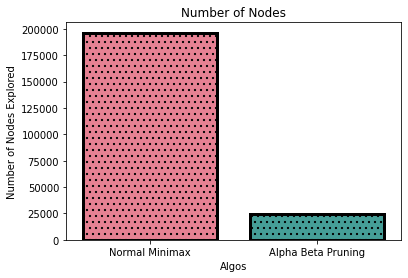

In [ ]:
print(minimax_work)
print(alphaBeta_work)
values = []
values.append(minimax_work)
values.append(alphaBeta_work)
names = []
names.append("Normal Minimax")
names.append("Alpha Beta Pruning")
sns.barplot(x=names,y=values, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Number of Nodes Explored')
plt.title('Number of Nodes')

**To compare minimax and alpha-beta pruning we can see the number of nodes explored by both the algorithms in the graph above.**

**We can see from the graph above that the total nodes explored by minimax is approxximately 8 times the number of nodes explored by alpha-beta Pruning.**

**So, savings made on number of nodes explored is very high in alpha-beta pruning as compared to minimax algorithm.**

### Answer.3: Let us assume that the decision on whether a player can place 1 stone or 2 stones is decided based on the toss of a coin. If Head comes then the player can place only 1 stone while a Tail on the coin flip will allow the player to place 2 stones. Find your best strategy in this version of the game using Expecti-Minimax in 5x5 grid with one blocked location.

In [ ]:
def p2_min(emptycells,depth):
  global expecti_minimax_nodesCount
  expecti_minimax_nodesCount = expecti_minimax_nodesCount + 1
  global expecti_minimax_depth
  if(expecti_minimax_depth < depth):
    expecti_minimax_depth = depth
 
  if(emptycells<=0):                                    # Check Terminal state : if no empty cells left that means PLayer 1 has already won
                                     
    return 1
                                                        # Return Min of all actions
  elif(emptycells>1):                                   # If cells left are more then 1 then Player 2 can place 1 or 2 stones
                        
    return min(chance(emptycells-1,2,depth+1),chance(emptycells-2,2,depth+1))
      
  elif(emptycells==1):
    return chance(emptycells-1,2,depth+1)                           # Else PLayer 2 can only place 1 stone

In [ ]:
def chance(emptycells,player,depth):                    # Chance Node
  global expecti_minimax_nodesCount
  global expecti_minimax_depth
  if(expecti_minimax_depth < depth):
    expecti_minimax_depth = depth
  expecti_minimax_nodesCount = expecti_minimax_nodesCount + 1
  if(player==2):                                          # If player 2 calls chance function
    if(emptycells<=0):                                    # Check Terminal state
      return -1
    return 0.5*p1_max(emptycells-1,depth+1) + 0.5*p1_max(emptycells-2,depth+1)                                  # Probability of both Head and Tail is 0.5
  elif(player==1):                                        # If player 1 calls chance function
    if(emptycells<=0):                                    # Check Terminal State
      return 1
    return 0.5*p2_min(emptycells-1,depth+1) + 0.5*p2_min(emptycells-2,depth+1)                                  # Probability of both Head and Tail is 0.5

In [ ]:
def p1_max(emptycells,depth):
  global expecti_minimax_nodesCount
  expecti_minimax_nodesCount = expecti_minimax_nodesCount + 1
  global expecti_minimax_depth
  if(expecti_minimax_depth < depth):
    expecti_minimax_depth = depth
  
  if(emptycells<=0):                                    # Check Terminal state : if no empty cells left that means PLayer 2 has already won
                                                        
    return -1
                                                        # Return Max of all actions
  elif(emptycells>1):                                   # If cells left are more then 1 then Player 1 can place 1 or 2 stones
                   
    return max(chance(emptycells-1,1,depth+1), chance(emptycells-2,1,depth+1) )
  elif(emptycells==1):
    return chance(emptycells-1,2,depth+1)                          # If cells left are only 1 then Player 1 can place only 1 stone
    

In [ ]:
def expecti_minimax(emptycells):
  global choice1
  global choice2
  global expecti_minimax_nodesCount
  expecti_minimax_nodesCount = expecti_minimax_nodesCount + 1
  choice1 = p2_min(emptycells-1,1)                     # Player 1 can either place 1 stone
  if(emptycells>1):
    choice2 = p2_min(emptycells-2,1)                     # or 2 stones
  if(choice1>choice2):                                  # Return max of choice 1 and choice 2
    res = choice1
    ch = 1
  else:
    res = choice2
    ch = 2
  
  return res,ch

In [ ]:
moves = []
expecti_minimax_nodesCount = 0
expecti_minimax_depth = 0
blocked_count = 1                 # Number of Blocked cells
Emptycells = 25 - blocked_count                     # Number of emptycells
value,tt = expecti_minimax(Emptycells)                                 
expecti_Totalnodes = expecti_minimax_nodesCount
expecti_minimax_Treedepth = expecti_minimax_depth
count = Emptycells                                              # define count to number of emptycells from start
while(count != 0):
  val,ch = expecti_minimax(count) 
  count = count - ch 
  moves.append(ch)
print(expecti_minimax_Treedepth)
print(expecti_Totalnodes)
print(value)
print(moves)

visualize(blocked_count)                       # Visualization
  


24
219601
-0.2890625
[1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1]
PLAYER 1 places 1 stone :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 1.]]
PLAYER 2 places 2 stones :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [2. 1. 1. 2. 1.]]
PLAYER 1 places 1 stone :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2.]
 [2. 1. 1. 2. 1.]]
PLAYER 2 places 1 stone :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 2.]
 [2. 1. 1. 2. 1.]]
PLAYER 1 places 2 stones :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 2. 1. 2.]
 [2. 1. 1. 2. 1.]]
PLAYER 2 places 2 stones :
[[0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2.]
 [1. 1. 2. 1. 2.]
 [2. 1. 1

**We can see that optimal moves achieved from expecti- minimax is different from minimax and alpha-beta pruning.**

### Answer.4: Experiment and analyze the effect of increasing the number of blocked cells from 1 to 5 on the performance of above algorithms (in terms of time, number of nodes explored, size of game tree). 

In [ ]:
algos = []
algos.append('Normal Mini-Max')
algos.append('alpha-beta Pruning')
algos.append('Expecti-Minimax')

#### Blocked Cell = 1

Text(0.5, 1.0, 'Time when Blocked cell = 1')

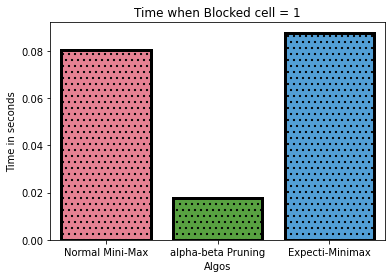

In [ ]:

time = []
time_start = timer()
win,tt = minimax(24) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = minimax_alphabeta(24) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = expecti_minimax(24)  
time_end = timer()
time.append(time_end - time_start)
sns.barplot(x=algos,y=time, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Time in seconds')
plt.title('Time when Blocked cell = 1')

**When Blocked cell = 1 :**

**Expecti-minimax takes the most time as it has to also deal with chance nodes.**

**Alpha-beta Pruning takes the least time as a lot of nodes are pruned, which saves majority of the time.**

Text(0.5, 1.0, 'Number of Nodes when Blocked cell = 1')

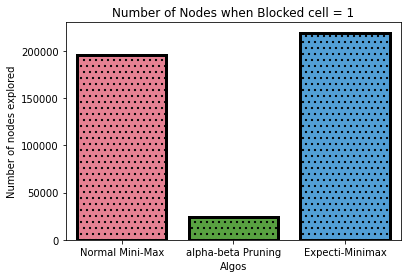

In [ ]:
number_of_nodes = []
number_of_nodes.append(minimax_work)
number_of_nodes.append(alphaBeta_work)
number_of_nodes.append(expecti_Totalnodes)
sns.barplot(x=algos,y=number_of_nodes, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Number of nodes explored')
plt.title('Number of Nodes when Blocked cell = 1')


**When Blocked cell = 1 :**

**Expecti-minimax has most number of nodes explored as there are also chance nodes present in expecti-minimax.**

**Alpha-beta Pruning has very very less number of nodes explored as a lot of the nodes are pruned in alpha-beta pruning.**

Text(0.5, 1.0, 'Tree depth when Blocked cell = 1')

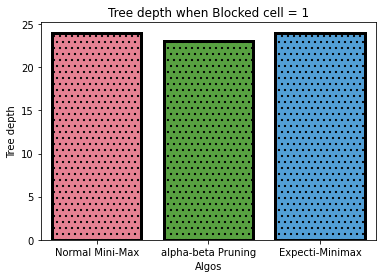

In [ ]:
Tree_depth = []
Tree_depth.append(normal_treeDepth)
Tree_depth.append(alphaBeta_treeDepth)
Tree_depth.append(expecti_minimax_Treedepth)
sns.barplot(x=algos,y=Tree_depth, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Tree depth')
plt.title('Tree depth when Blocked cell = 1')

**When Blocked cell = 1 :**

**Expecti-minimax and Normal minimax has the size of the tree or tree depth same.**

**Alpha-beta Pruning has slightly less tree depth as a larger depth is never explored because of pruning.**

#### Blocked Cell = 2

Text(0.5, 1.0, 'Time when Blocked cell = 2')

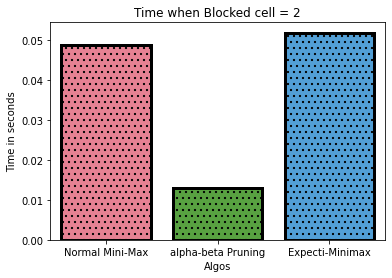

In [ ]:
time = []
normal_nodesCount = 0            
normal_depth = 0       
alphaBeta_nodesCount = 0                                             
alphaBeta_depth = 0      
expecti_minimax_nodesCount = 0
expecti_minimax_depth = 0                                                 
time_start = timer()
win,tt = minimax(23) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = minimax_alphabeta(23) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = expecti_minimax(23)  
time_end = timer()
time.append(time_end - time_start)
sns.barplot(x=algos,y=time, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Time in seconds')
plt.title('Time when Blocked cell = 2')

**When Blocked cell = 2 :**

**Expecti-minimax takes the most time as it has to also deal with chance nodes.**

**Alpha-beta Pruning takes the least time as a lot of nodes are pruned, which saves majority of the time.**

Text(0.5, 1.0, 'Number of Nodes when Blocked cell = 2')

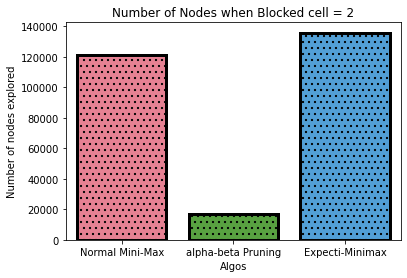

In [ ]:
number_of_nodes = []
number_of_nodes.append(normal_nodesCount)
number_of_nodes.append(alphaBeta_nodesCount)
number_of_nodes.append(expecti_minimax_nodesCount)
sns.barplot(x=algos,y=number_of_nodes, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Number of nodes explored')
plt.title('Number of Nodes when Blocked cell = 2')

**When Blocked cell = 2 :**

**Expecti-minimax has most number of nodes explored as there are also chance nodes present in expecti-minimax.**

**Alpha-beta Pruning has very very less number of nodes explored as a lot of the nodes are pruned in alpha-beta pruning.**

Text(0.5, 1.0, 'Tree depth when Blocked cell = 2')

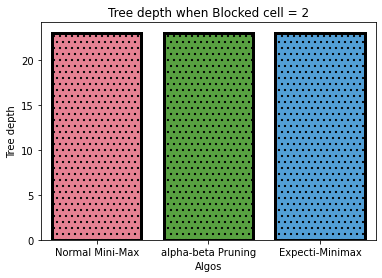

In [ ]:
Tree_depth = []
Tree_depth.append(normal_depth)
Tree_depth.append(alphaBeta_treeDepth)
Tree_depth.append(expecti_minimax_depth)
sns.barplot(x=algos,y=Tree_depth, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Tree depth')
plt.title('Tree depth when Blocked cell = 2')

**When Blocked cell = 2 :**

**Expecti-minimax and Normal minimax has the size of the tree or tree depth same.**

**Alpha-beta Pruning also has same tree depth as this time larger depth is explored instead of pruning.**

I have plotted the same for Blocked cells = 3, 4 and 5 .

#### Blocked Cell = 3

Text(0.5, 1.0, 'Time when Blocked cell = 3')

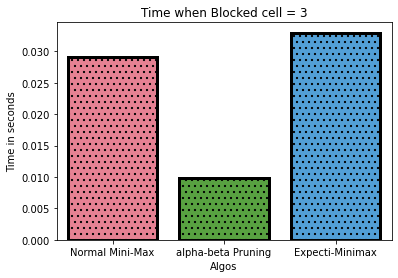

In [ ]:
time = []
normal_nodesCount = 0            
normal_depth = 0       
alphaBeta_nodesCount = 0                                             
alphaBeta_depth = 0      
expecti_minimax_nodesCount = 0
expecti_minimax_depth = 0                                                 
time_start = timer()
win,tt = minimax(22) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = minimax_alphabeta(22) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = expecti_minimax(22)  
time_end = timer()
time.append(time_end - time_start)
sns.barplot(x=algos,y=time, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Time in seconds')
plt.title('Time when Blocked cell = 3')

Text(0.5, 1.0, 'Number of Nodes when Blocked cell = 3')

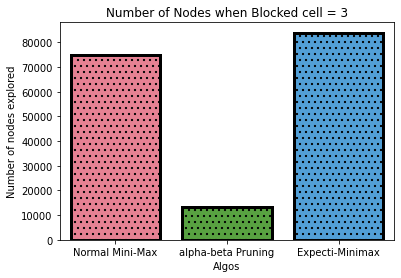

In [ ]:
number_of_nodes = []
number_of_nodes.append(normal_nodesCount)
number_of_nodes.append(alphaBeta_nodesCount)
number_of_nodes.append(expecti_minimax_nodesCount)
sns.barplot(x=algos,y=number_of_nodes, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Number of nodes explored')
plt.title('Number of Nodes when Blocked cell = 3')

Text(0.5, 1.0, 'Tree depth when Blocked cell = 3')

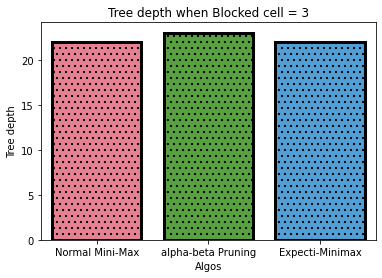

In [ ]:
Tree_depth = []
Tree_depth.append(normal_depth)
Tree_depth.append(alphaBeta_treeDepth)
Tree_depth.append(expecti_minimax_depth)
sns.barplot(x=algos,y=Tree_depth, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Tree depth')
plt.title('Tree depth when Blocked cell = 3')

#### Blocked Cell = 4

Text(0.5, 1.0, 'Time when Blocked cell = 4')

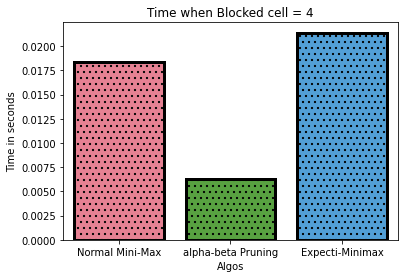

In [ ]:
time = []
normal_nodesCount = 0            
normal_depth = 0       
alphaBeta_nodesCount = 0                                             
alphaBeta_depth = 0      
expecti_minimax_nodesCount = 0
expecti_minimax_depth = 0                                                 
time_start = timer()
win,tt = minimax(21) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = minimax_alphabeta(21) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = expecti_minimax(21)  
time_end = timer()
time.append(time_end - time_start)
sns.barplot(x=algos,y=time, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Time in seconds')
plt.title('Time when Blocked cell = 4')

Text(0.5, 1.0, 'Number of Nodes when Blocked cell = 4')

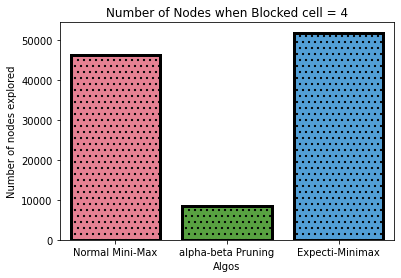

In [ ]:
number_of_nodes = []
number_of_nodes.append(normal_nodesCount)
number_of_nodes.append(alphaBeta_nodesCount)
number_of_nodes.append(expecti_minimax_nodesCount)
sns.barplot(x=algos,y=number_of_nodes, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Number of nodes explored')
plt.title('Number of Nodes when Blocked cell = 4')

Text(0.5, 1.0, 'Tree depth when Blocked cell = 4')

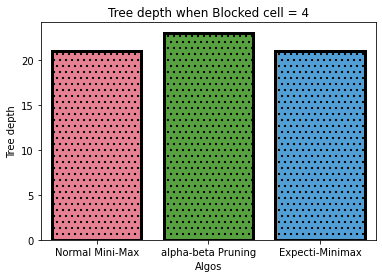

In [ ]:
Tree_depth = []
Tree_depth.append(normal_depth)
Tree_depth.append(alphaBeta_treeDepth)
Tree_depth.append(expecti_minimax_depth)
sns.barplot(x=algos,y=Tree_depth, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Tree depth')
plt.title('Tree depth when Blocked cell = 4')

#### Blocked Cell = 5

Text(0.5, 1.0, 'Time when Blocked cell = 5')

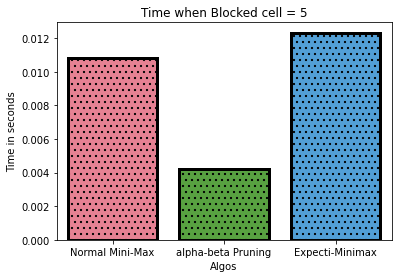

In [ ]:
time = []
normal_nodesCount = 0            
normal_depth = 0       
alphaBeta_nodesCount = 0                                             
alphaBeta_depth = 0      
expecti_minimax_nodesCount = 0
expecti_minimax_depth = 0                                                 
time_start = timer()
win,tt = minimax(20) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = minimax_alphabeta(20) 
time_end = timer()
time.append(time_end - time_start)

time_start = timer()
win,tt = expecti_minimax(20)  
time_end = timer()
time.append(time_end - time_start)
sns.barplot(x=algos,y=time, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Time in seconds')
plt.title('Time when Blocked cell = 5')

Text(0.5, 1.0, 'Number of Nodes when Blocked cell = 5')

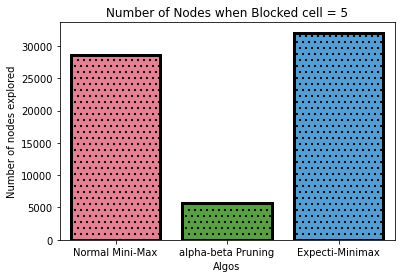

In [ ]:
number_of_nodes = []
number_of_nodes.append(normal_nodesCount)
number_of_nodes.append(alphaBeta_nodesCount)
number_of_nodes.append(expecti_minimax_nodesCount)
sns.barplot(x=algos,y=number_of_nodes, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Number of nodes explored')
plt.title('Number of Nodes when Blocked cell = 5')

Text(0.5, 1.0, 'Tree depth when Blocked cell = 5')

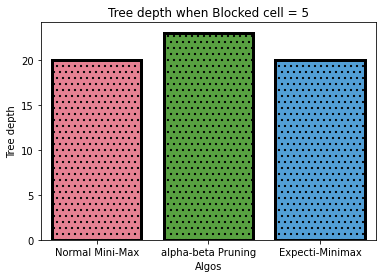

In [ ]:
Tree_depth = []
Tree_depth.append(normal_depth)
Tree_depth.append(alphaBeta_treeDepth)
Tree_depth.append(expecti_minimax_depth)
sns.barplot(x=algos,y=Tree_depth, palette="husl",lw=3,ec="black",hatch="..")
plt.xlabel('Algos')
plt.ylabel('Tree depth')
plt.title('Tree depth when Blocked cell = 5')

**OBSERVATIONS :**


*   When blocked cell is only equal to 1 alpha-beta performs the best.
*   But as we keep on increasing the blocked cells, the performance of all 3 algos start to become similar as number of empty cells start to decrease.



#### [Bonus] Implement a visualization (GUI) of this game and try to play against your coded algorithms. Report your experience and findings.

**The code for this GUI is in another file names as bonus_2021CSM1001.ipynb which is also present in the zip file. Kindly run that file on jupyter notebook.**

**I have uploaded the screenshots and findings of the game here :**

**The number of blocked cells are zero and total empty cells are 25.
This is the start of the game :**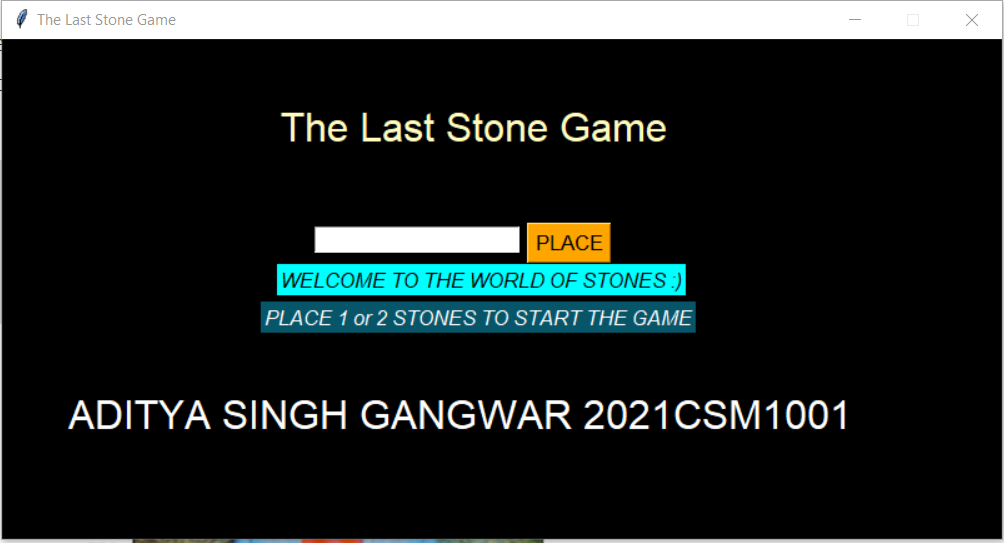

**When I always choose to place 1 stone only :**

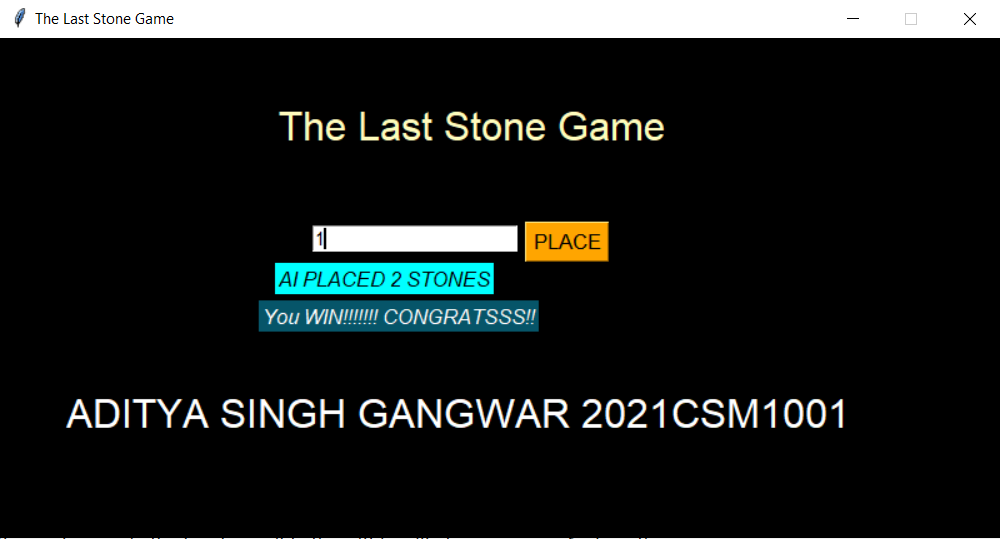

**When I always choose to place 2 stones :**
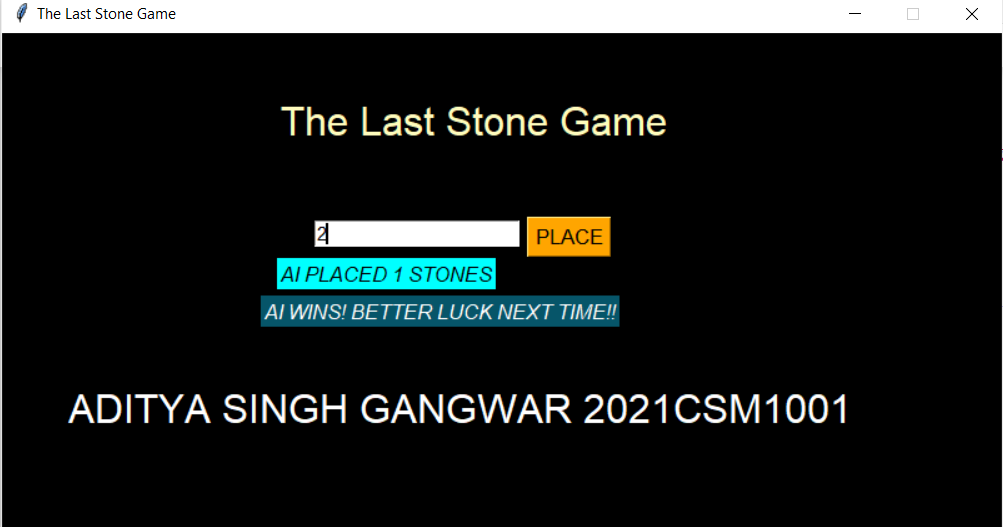

**Findings :**


*  I played the game considering 2 cases.
*  Case 1: I always place 1 stone. When I always place 1 stone, the AI choose to always place 2 stones, which results in my winning.


*   Case 2: I always place 2 stones. When I always place 2 stones, the AI chooses to place always 1 stones, which resluts in the winning of AI.
*   **Conclusion :** The conclusion that we can make from this is, because we are not making optimal decisions the AI which is using minimax algorithm is also not making optimal decision. So, to make use of minimax algorithm both the player and AI need to make optimal moves.


